<a href="https://colab.research.google.com/github/ambika1us/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Capstone_Project_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H4><b>Project Name:</b> Netflix Movies and TV Shows Clustering</H4>
<H5><b>Project Type:</b> Unsupervised</H5>
<H5><b>Contribution:</b> Individual</H5>
<H5><b>Team Member:</b> Ambika Prasad Rath (ambika1us@gmail.com)</H5>

<h5><b>Project Summary:</b></h5><br>
<P>This dataset consists of TV shows and movies available as of 2019. The dataset is collected from flixable which is third party Netflix search engine in 2018. They released an interesting report which shows that the number of TV shows on netflix has nearly tripled since 2010. The streaming services number of movies has decreased by more than 2000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB rating, rotten tomatoes can also provide many interesting findings.</P>

<H5><b>GitHub Link:</b></H5>
<p>https://github.com/ambika1us/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING</p>

<h5><b>Problem Statement:</b></H5>
<p>This dataset consists of TV shows and movies available as of 2019. The dataset is collected from flixable which is third party Netflix search engine in 2018. They released an interesting report which shows that the number of TV shows on netfli9x has nearly tripled since 2010. The streaming services number of movies has decreased by more than 2000 titles since 2010, while its number of TV shows has nearly tripled. it will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB rating.</p>
<h6><b>Approch:</b></h6>
<p>Initiaqlly, in the 1st step imported the dataset to carryout the analysis over the dataset to comprehend the details of available data and checked for null values and treated them. Here, we found more than 30% null values in the director's column. Then, we take appropriate action for null values according to the circumstances.</p>
<p>Performed the exploratory data analysis and tried to get the understanding of the data and how the content is distributed in the dataset, its type and details such as which countries are watching more and which type of content is in demand etc. has been analyzed in this step with the help of visualization graph by getting insights from analysis.</p>

<h5><b>In this project, we are required to do:</b></h5>
<ol>
<li>Exploratory Data Analysis.</li>
<li>Understanding what type content is available in different countries.</li>
<li>Is Netflix has increasingly focusing on TV rather than movies in recent years.</li>
<li>Clustreing similar content by matching Text-Based features.</li>
</ol>

<H5><B>Attribute Information:</B></H5>
<ol>
<li><b>show_id:</b> UniqueID for every movie/TV show</li>
<li><b>type:</b> Identifier- A movie or TV show</li>
<li><b>title:</b> Title of the movie/TV show</li>
<li><b>director:</b> Director of the movie</li>
<li><b>cast:</b> Actors involved in the movie/show</li>
<li><b>country:</b> Country where the movie/show was produced</li>
<li><b>date_added:</b> Date it was added on Netflix</li>
<li><b>release_year:</b> Actual release year of the movie/show</li>
<li><b>rating:</b> TV rating of the movie/show</li>
<li><b>duration:</b> Total duration-in minutes or number of season</li>
<li><b>listed_in:</b> Genere</li>
<li><b>description:</b> The summary description</li>
</ol>

<h4><b>Steps Involved:</b></h4>
<p><b>Exploratory Data Analysis:</b> After loading the dataset we performed EDA. This process helped us figure out various aspects and relationships. It gave us a better idea of which feature behaves in which manner.</p>
<p><b>Null Values Treatment:</b> Our dataset contains many null values. we fill them with some other values and we also drop some of the them because null values might tend to disturb our model.</p>
<p><b>Standardization of features:</b> Our main motive through this step was to scale our data into a uniform format that would allow us to utilize the data in a better way while performing fitting and applying different algorithms to it. The basic goal was to enforce a level of consistency or uniforming to certain practices or operation within the selected environment.</p>

<b>Importing Libraries</b>

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from numpy import math
from sklearn.preprocessing import LabelEncoder

from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import pylab as pl
import sklearn
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
!pip install nltk
import nltk
!python3-c "import nltk; nltk.download('all')"

from nltk import ne_chunk

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn import metrics

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

/bin/bash: python3-c: command not found


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<b>Loading the Dataset</b>

In [3]:
#Mounting Google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loading the dataset
nfx=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_Unsupervised_Learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
#Top 5 Rows
nfx.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#Checking the shape of dataset
nfx.shape

(7787, 12)

In [6]:
#Column Names
nfx.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#Information about the dataset
nfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<b>Data Processing</b>

In [8]:
#Drop duplicates
nfx[nfx.duplicated()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There are no duplicate values

<b>Handling Null Values</b>

In [9]:
#Checking Null Values
nfx.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
#Total Null Values
nfx.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column, 507 null values in country column, 10 in date_added and 7 in rating, so, we need to handle the null values.

In [11]:
#Handling Null Values
nfx['cast'].fillna(value='No cast', inplace=True)
nfx['country'].fillna(value=nfx['country'].mode()[0], inplace=True)

In [12]:
#date_added and rating contains an insignificant portion of the data so we will drop them from the dataset
nfx.dropna(subset=['date_added','rating'], inplace=True)

In [13]:
#Droping Director column
nfx.drop(['director'],axis=1, inplace=True)

In [14]:
#Again checking is there any null values or not
nfx.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
#Add new Features
nfx['date_added']=pd.to_datetime(nfx['date_added'])
nfx['year_added']=nfx['date_added'].dt.year
nfx['month_added']=nfx['date_added'].dt.month

<h5><b>Exploratory Data Analysis</b></h5>

<h5>Analyze the type of content available on Netflix</h5>
<p>Analysis entire Netflix dataset consisting of both movies and shows. Let's compare the total number of movies and shows in this dataset to know which one is the majority.</p>

<p>Netflix content by Type</p>

In [16]:
#ploting for pie chart on type feature
x=nfx['type'].value_counts().reset_index()
colors=['DodgerBlue','PaleTurquoise']
fig=px.pie(x,title='Type of Netflix Contents',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside',textinfo='percent+label',textfont_size=20,marker=dict(colors=colors,line=dict(color='#000000',width=2)))

<p><b>Observations:</b></p>
<ul>
<li>It is evident that there are more movies on Netflix than TV shows</li>
<li>Netflix has 5377 movies, which is more than double the quantity of TV shows</li>
<li>There are about 70% movies and 30% TV shows on Netflix</li>
</ul>

In [17]:
country=nfx['country'].value_counts().reset_index()
country=country[country['country']/country['country'].sum()>0.01]

fig=px.pie(country,values='country',names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside',textinfo='percent+label',marker=dict(line=dict(color='darkred',width=2)))
fig.show()

Text(0.5, 1.0, 'Total Releease for Last 10 Years')

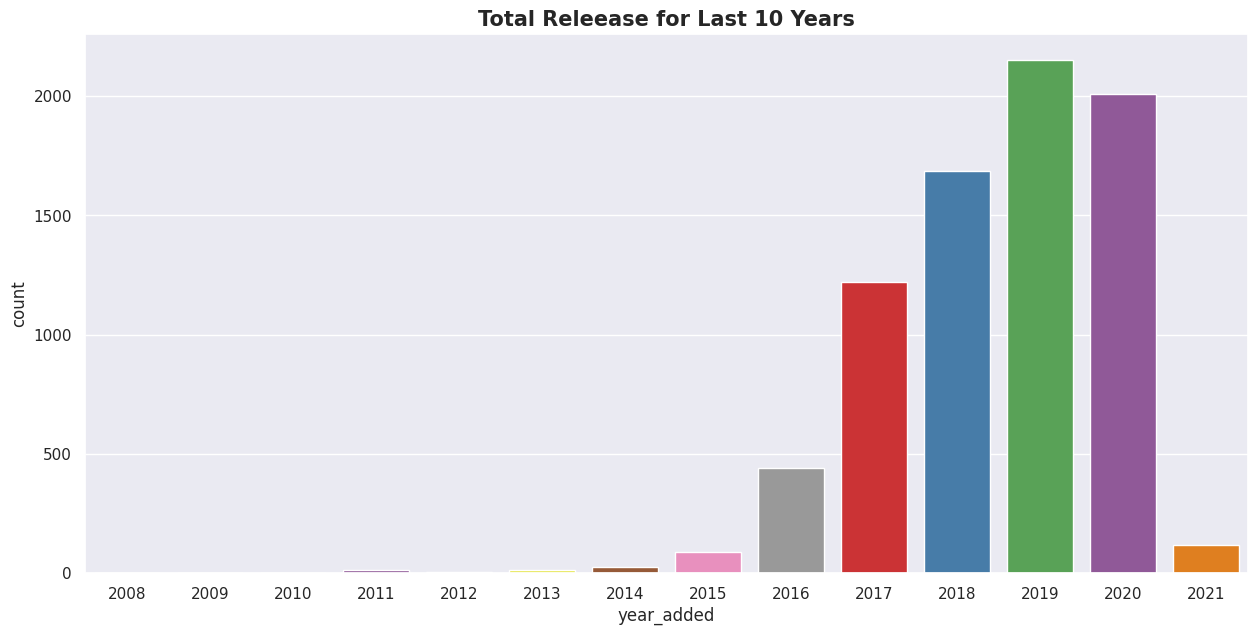

In [18]:
#Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=nfx,palette="Set1")
plt.title('Total Releease for Last 10 Years', size='15',fontweight="bold")

<p><b>The number of release have significantly increased after 2015 & have dropped in 2021 because of covid19</b></p>

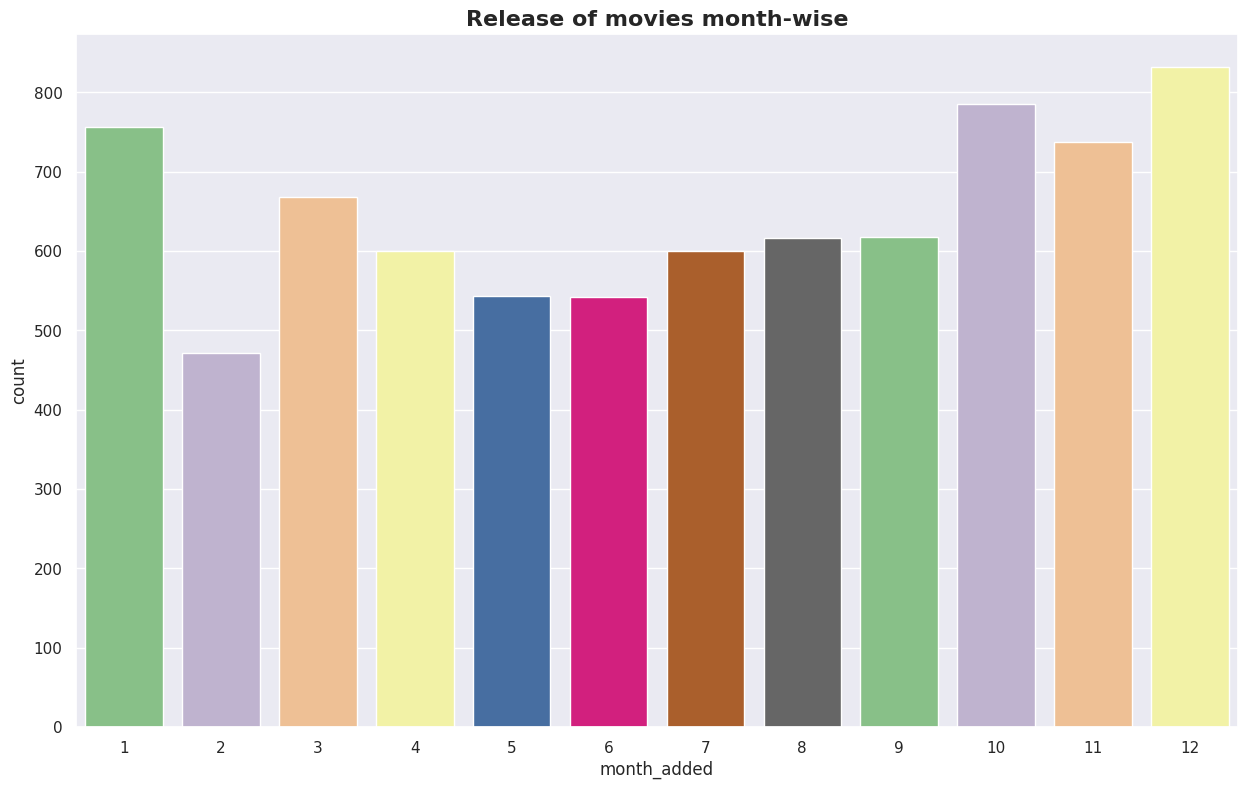

In [19]:
#Release of movies-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=nfx,palette='Accent')
plt.title('Release of movies month-wise', size="16",fontweight="bold")
plt.show()

<p><b>More of the conent is released in holiday season - October, November, december and Janusry.</b></p>

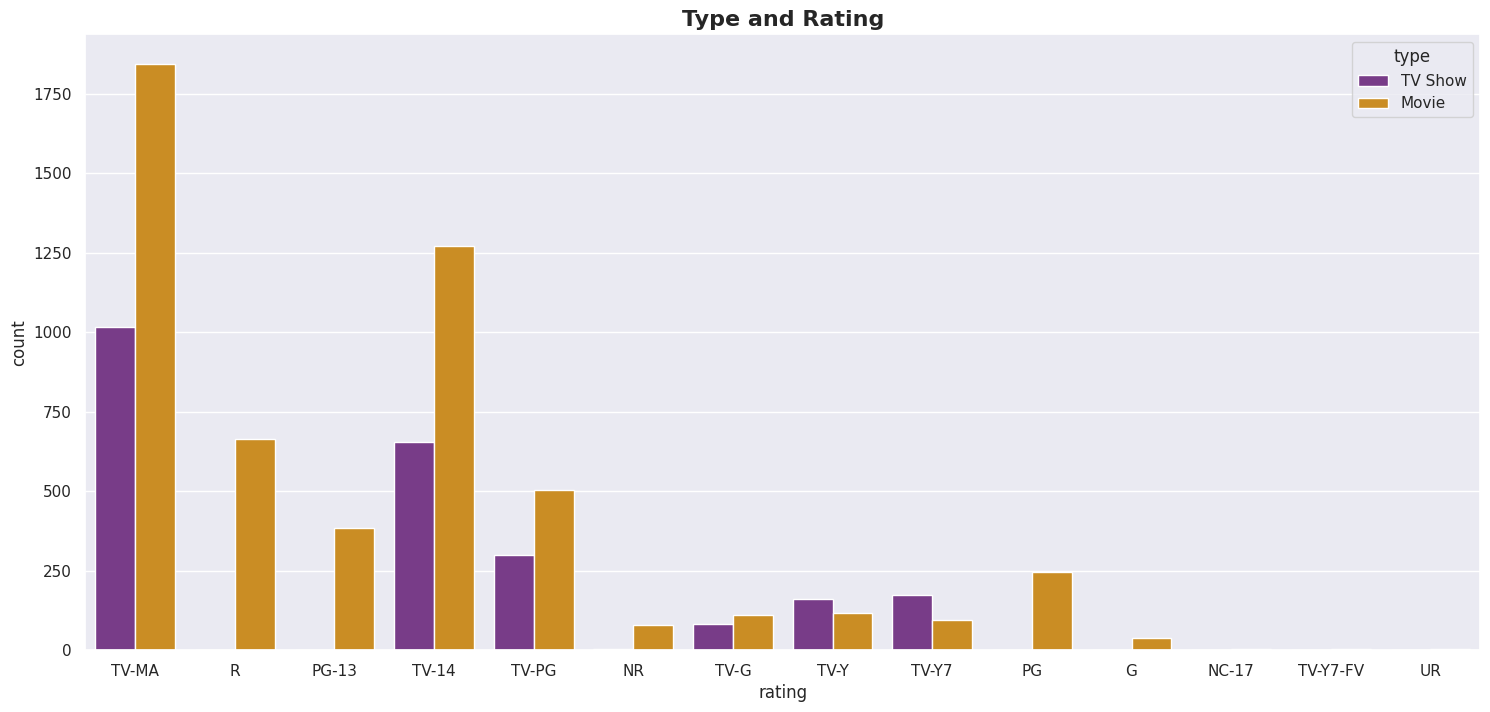

In [20]:
#Rating
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=nfx,palette="CMRmap")
plt.title('Type and Rating', size='16',fontweight='bold')
plt.show()

<p><b>Top Genre in Movies</b></p>

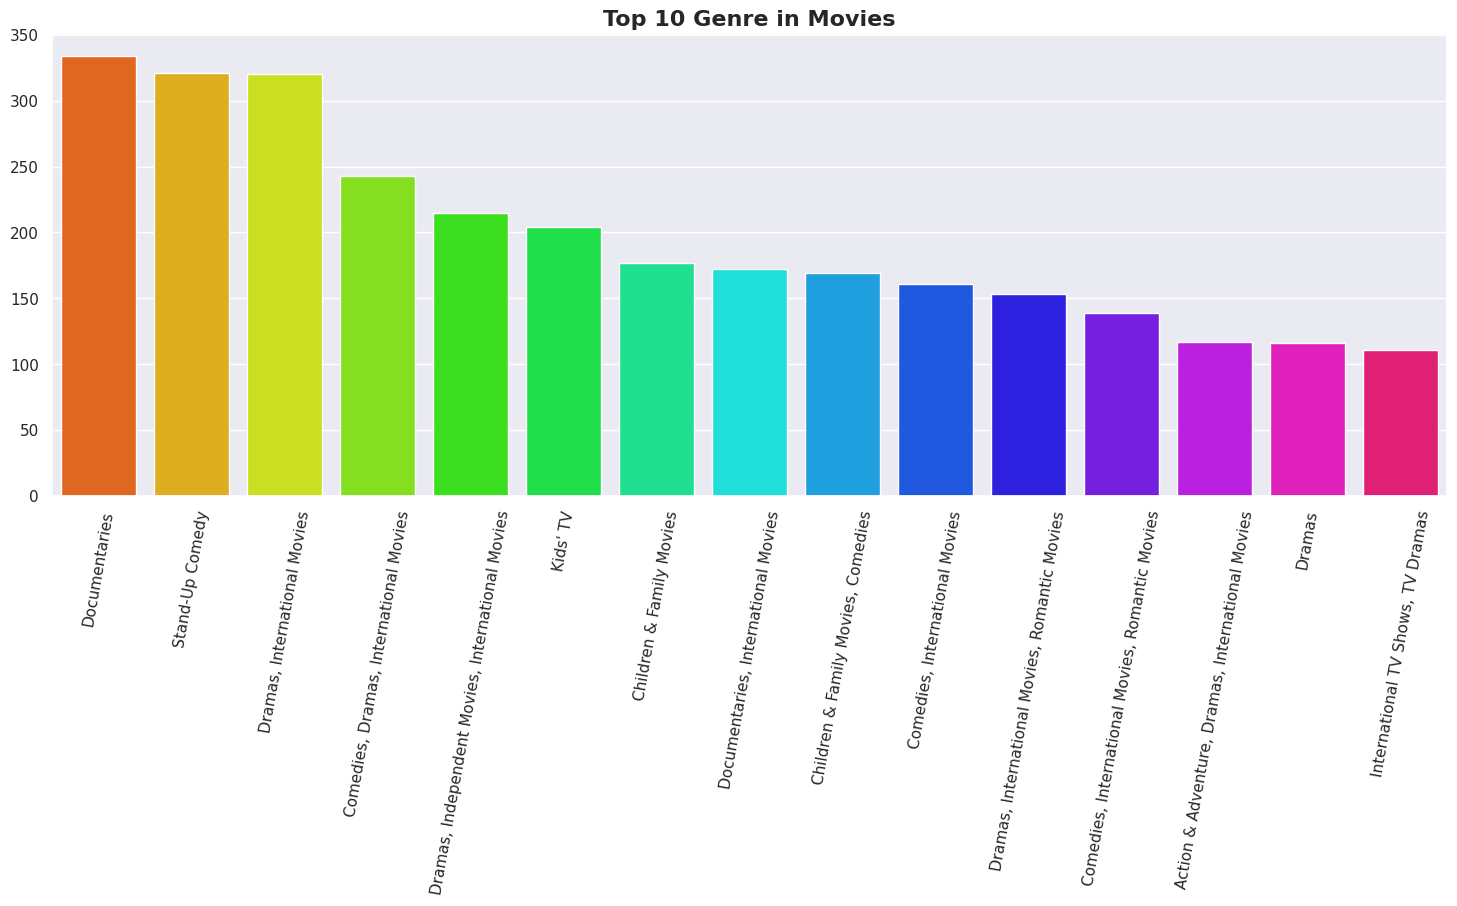

In [21]:
#Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x=nfx['listed_in'].value_counts().head(15).index, y=nfx['listed_in'].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top 10 Genre in Movies", size="16",fontweight="bold")
plt.show()

<p><b>from the graph, we know that Documentaries take the first place, followed by stand-up comedy and dramas, international movies.</b></p>

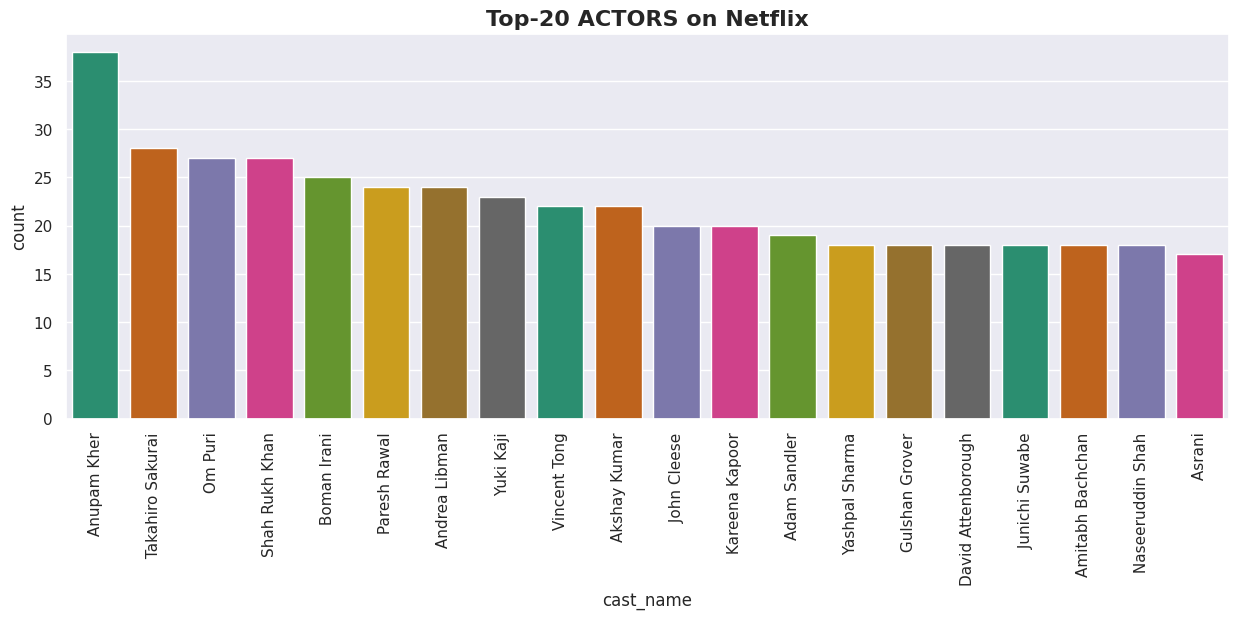

In [22]:
#Top 20 actors netflix
nfx['cast_name']=nfx['cast'].apply(lambda x: x.split(','))
cast_count=[]
for i in nfx['cast_name']:cast_count+=i
cast_dict=dict((i,cast_count.count(i)) for i in cast_count)
df_cast_count=pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(columns={'index':'cast_name',0:'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix", size="16",fontweight='bold')
plt.xticks(rotation=90)
plt.show()

<p><b>The top actors on Netflix movies based on the number of titles is Anupam Kher</b><p>

In [23]:
tv_shows=nfx[nfx['type']=='TV Show']
movies=nfx[nfx['type']=='Movie']

In [24]:
#Release Year
movie1_year=movies['release_year'].value_counts().sort_index(ascending=False)
movie1_year

2021     12
2020    411
2019    582
2018    734
2017    742
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [25]:
tvshow_year=tv_shows['release_year'].value_counts().sort_index(ascending=False)
tvshow_year

2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
2001      4
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      1
1993      4
1992      2
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1968      1
1967      1
1963      1
1946      1
1925      1
Name: release_year, dtype: int64

Text(0.5, 1.02, 'Production growth yearly')

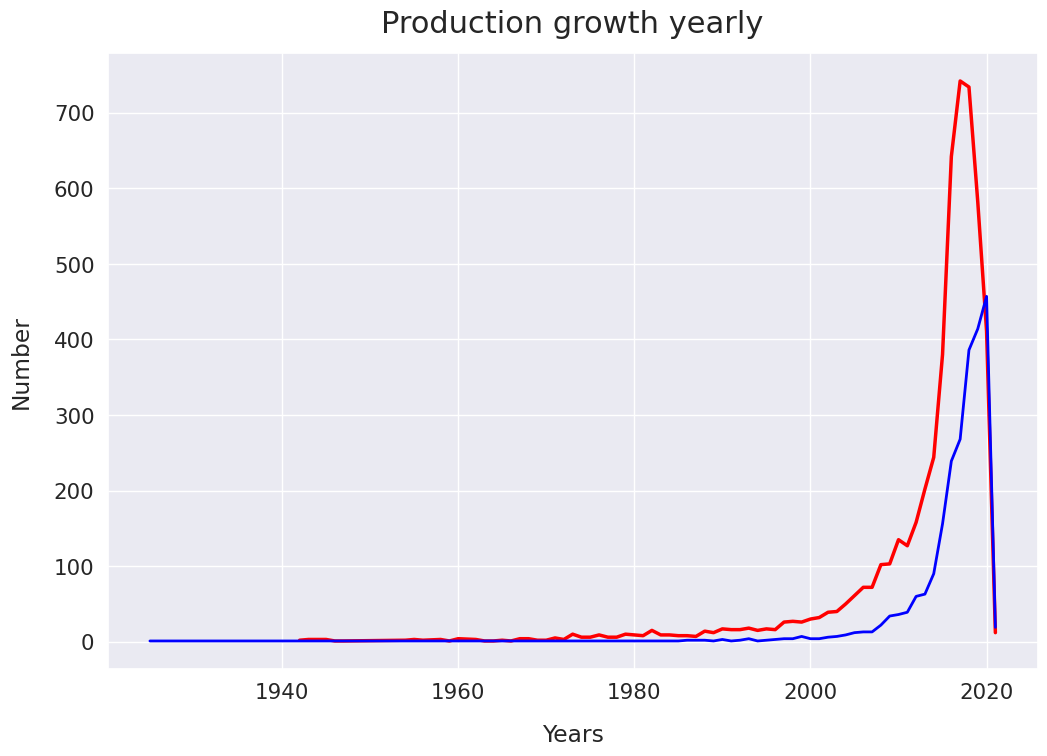

In [26]:
#Visualizing the movies and TV Shows based on the release year
sns.set(font_scale=1.4)
movie1_year.plot(figsize=(12,8),linewidth=2.5,color='red',label="Movies/year",ms=3)
tvshow_year.plot(figsize=(12,8),linewidth=2,color='blue',label="TV Show/year")
plt.xlabel("Years",labelpad=15)
plt.ylabel("Number",labelpad=15)
plt.title("Production growth yearly",y=1.02,fontsize=22)

<ul>
<li>Highest number of movies released in 2017 and 2018</li>
<li>Higest number of movies released in 2020</li>
<li>The number of movies on Netflix is growing significantly faster than the number of TV shows</li>
<li>We saw a huge increse in the number of movies and television episodes after 2015</li>
<li>There is a significant drop in the number of movies and television episode produced after 2020</li>
<li>It appeares that Netflix has focused more attention on increasing movie content more dramatically than TV shows</li>
</ul>

In [27]:
nfx['duration']=nfx['duration'].str.replace('Season','')
nfx['duration']=nfx['duration'].str.replace('s','')
nfx['duration']=nfx['duration'].str.replace('min','')

In [28]:
nfx['duration']=nfx['duration'].astype(str).astype(int)
nfx['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7770, dtype: int64

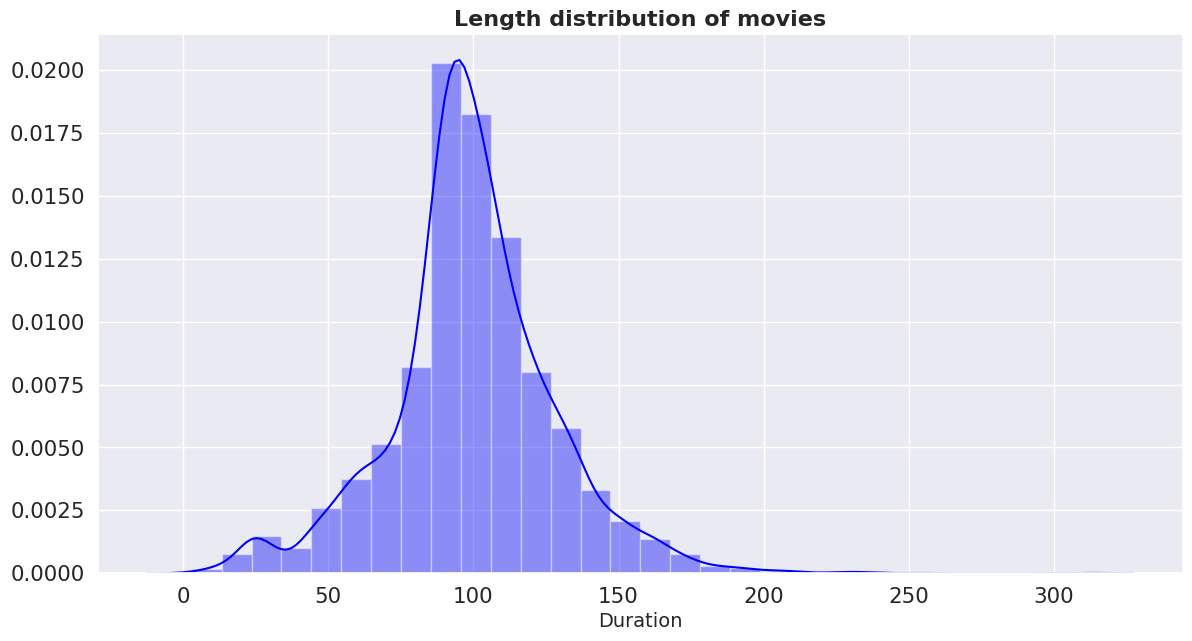

In [29]:
#Length distribution of movies
movie_df=nfx[nfx['type']=='Movie']
plt.figure(figsize=(14,7))
sns.distplot(movie_df['duration'],bins=30,color='blue').set(ylabel=None)
plt.title('Length distribution of movies',fontsize=16,fontweight='bold')
plt.xlabel('Duration', fontsize=14)
plt.show()

In [30]:
#Season-wise distribution of tv shows
tv_df=nfx[nfx['type']=='TV Show']
tv_df['duration'].value_counts()

tv=tv_df['duration'].value_counts().T.reset_index()

fig=px.pie(tv,values='duration',names='index',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside',textinfo='percent+label',textfont_size=20,marker=dict(line=dict(color='RebeccaPurple',width=2)))

<h5><b>Longest TV-Shows</b></h5>

In [31]:
long_shows=tv_df[tv_df['duration']>9]
long_shows_df=long_shows[['title','duration']]
long_shows_df.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


<h5><b>Data Cleaning and Preprocessing</b></h5>

In [32]:
nfx.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'cast_name'],
      dtype='object')

In [33]:
movie_df.drop(columns=['show_id','title','cast','date_added','description','cast_name'],axis=1,inplace=True)

In [34]:
tv_df.drop(columns=['show_id','title','cast','date_added','description','cast_name'],axis=1,inplace=True)

In [35]:
new_fx_df=nfx.drop(columns=['show_id','title','cast','date_added','description','cast_name'],axis=1)

In [36]:
new_fx_df

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,TV Show,Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1
...,...,...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44,"Documentaries, International Movies, Music & M...",2020,9
7785,TV Show,Australia,2019,TV-PG,1,"International TV Shows, Reality TV",2020,10


In [37]:
#From sklearn preprocessing import LabelEncoder
le=LabelEncoder()
new_fx_df['type']=le.fit_transform(new_fx_df['type'])
new_fx_df['country']=le.fit_transform(new_fx_df['country'])

new_fx_df['rating']=le.fit_transform(new_fx_df['rating'])
new_fx_df['listed_in']=le.fit_transform(new_fx_df['listed_in'])

<h5><b>Text Cleaning</b></h5>

In [38]:
#combining genre and description column
txt_df=nfx['listed_in']+nfx['description']
txt_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7770, dtype: object

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
#function for cleaning text
def clean_text(text):
  wnl=WordNetLemmatizer()
  word_tokens=word_tokenize(text)
  tokens=[wnl.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
  cleaned_text="".join(tokens)
  return cleaned_text

In [41]:
new_txt_df=txt_df.apply(clean_text)
new_txt_df

0       InternationalShowsDramasSci-FiFantasyInfuturee...
1       DramasInternationalMoviesAfterdevastatingearth...
2       HorrorMoviesInternationalMoviesWhenarmyrecruit...
3       ActionAdventureIndependentMoviesSci-FiFantasyI...
4       DramasAbrilliantgroupstudentbecomecard-countin...
                              ...                        
7782    DramasInternationalMoviesWhenLebanonCivildepri...
7783    DramasInternationalMoviesMusicMusicalsAscrappy...
7784    DocumentariesInternationalMoviesMusicMusicalsI...
7785    InternationalShowsRealityTVDessertwizardAdrian...
7786    DocumentariesMusicMusicalsThisdocumentarydelfm...
Length: 7770, dtype: object

<h5><b>Extracting The Features and Creating the Document-Term-Matrix(DTM)</b></h5>
<ol>
<li>LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.</li>
<li>max_features depends on your computing power and also on eval.metric (coherence score is a metric for topic model). Try the value that gives best eval.metric and doesn't limits processing power.</li>
<li>Default values for min_df & max_df worked well.</li>
<li>Can try different values for ngram_range.</li>
</ol>

In [42]:
vect=TfidfVectorizer(stop_words=list(STOPWORDS), max_features=1000)
vect_txt=vect.fit_transform(nfx['description'])
print(vect.get_feature_names_out())

['000' '10' '12' '1970s' '1980s' '20' '30' '50' 'academy' 'accident'
 'accidentally' 'accused' 'across' 'act' 'action' 'activist' 'actor'
 'actress' 'adventure' 'adventures' 'affair' 'africa' 'african' 'age'
 'aged' 'agent' 'agents' 'aging' 'ago' 'agrees' 'alien' 'along' 'also'
 'always' 'ambitious' 'america' 'american' 'amid' 'among' 'ancient'
 'angeles' 'animal' 'animals' 'animated' 'another' 'answers' 'anthology'
 'anything' 'apart' 'apartment' 'army' 'around' 'arrives' 'art' 'artist'
 'artists' 'arts' 'aspiring' 'assassin' 'attack' 'attempt' 'attempts'
 'avenge' 'away' 'baby' 'bachelor' 'back' 'bad' 'band' 'bank' 'based'
 'battle' 'battles' 'beautiful' 'beauty' 'become' 'becomes' 'becoming'
 'befriends' 'begin' 'begins' 'behind' 'beloved' 'best' 'better' 'beyond'
 'big' 'biggest' 'bill' 'biopic' 'birth' 'birthday' 'black' 'body'
 'bollywood' 'bond' 'bonds' 'book' 'born' 'boss' 'boy' 'boyfriend' 'boys'
 'brave' 'break' 'breaks' 'bring' 'brings' 'british' 'brother' 'brothers'
 'bruta

In [43]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names_out(),idf))
i=sorted(dd,key=(dd).get)
print(i[0],i[-1])
print(dd['international'])
print(dd['bank'])

life 50
6.5569567535470865
6.431793610593081


<h5><b>Topic Modeling</b></h5>

<h6><b>1.LSA (Latent semantic analysis)</b></h6>
<p>LSA is techinique in natural language processing, in particular distributional semantics of analyzing relationalship between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assume that words that are close in meaning will occur in similar pieces of text.</p>

In [44]:
lsa_model=TruncatedSVD(n_components=10,algorithm='randomized',n_iter=10,random_state=42)

lsa_top=lsa_model.fit_transform(vect_txt)
print(lsa_top[0])
print(lsa_top.shape)

[ 0.10036808 -0.02621447  0.05633172 -0.05111105 -0.04662858  0.03789343
 -0.00562566  0.02403855 -0.02694175  0.01181998]
(7770, 10)


In [45]:
l=lsa_top[0]
print("Netflix topic 0:")
for i,topic in enumerate(l):
  print("Netflix Topic",i,":",topic*100)

Netflix topic 0:
Netflix Topic 0 : 10.036808078890264
Netflix Topic 1 : -2.6214472430145213
Netflix Topic 2 : 5.633171670895043
Netflix Topic 3 : -5.111105107383082
Netflix Topic 4 : -4.662857506562797
Netflix Topic 5 : 3.789342865585528
Netflix Topic 6 : -0.5625658431843596
Netflix Topic 7 : 2.403854926923784
Netflix Topic 8 : -2.6941750952017705
Netflix Topic 9 : 1.1819981366357473


<h5><b>Similarly for other documents we can do this. However note that values don't add to 1 as in LSA it is not probability of a topic in a document.</b></h5>

In [46]:
print(lsa_model.components_.shape)
print(lsa_model.components_)

(10, 1000)
[[ 1.01216639e-02  1.68927792e-02  9.17158903e-03 ...  4.38417794e-02
   2.38720680e-01  1.35601878e-02]
 [-7.90247947e-03 -2.39667153e-03  1.80486500e-03 ... -4.78511258e-02
   4.20065018e-01  1.04754432e-02]
 [ 4.45775593e-03  7.10534324e-03  1.13631895e-04 ...  8.22210732e-02
  -1.68973368e-01  2.00507893e-04]
 ...
 [ 6.17604551e-03 -1.22360026e-02 -2.94709089e-03 ... -1.80062178e-02
   1.52562282e-01 -1.22325607e-02]
 [-4.58353274e-03  3.65058035e-03 -1.16886101e-02 ...  1.10704726e-01
   3.09003444e-01 -1.23651745e-02]
 [ 9.60565940e-03  4.76405399e-02  2.71530325e-02 ... -4.34532264e-02
  -9.41730016e-02  1.48029072e-03]]


In [47]:
#Top 10 Topics on Netflix
vocab=vect.get_feature_names_out()

for i,comp in enumerate(lsa_model.components_):
  vocab_comp=zip(vocab,comp)
  sorted_words=sorted(vocab_comp,key=lambda x:x[1], reverse=True)[:10]
  print("Netflix Genre"+str(i)+":")
  for t in sorted_words:
    print(t[0],end=" ")
  print("\n")

Netflix Genre0:
life young new family man woman love world two friends 

Netflix Genre1:
young man woman father love family falls son mother finds 

Netflix Genre2:
new school friends high two student must find york city 

Netflix Genre3:
life new love stand special school finds york high comedian 

Netflix Genre4:
new world york finds family city man home documentary help 

Netflix Genre5:
stand special comedy comedian friends one show family comic two 

Netflix Genre6:
family school high old stand special year father series comedy 

Netflix Genre7:
world stand special school high man comedy comedian young takes 

Netflix Genre8:
young documentary new series lives school york woman high takes 

Netflix Genre9:
old year life man documentary help takes friend back boy 



<ol>
<li>We can see that the topic modelling did the genre analysis in movies and tv shows.</li>
<li>Each topic identifies genre of movies and tv shows on Netflix.</li>
</ol>

<h5><b>Latent Dirichiet Allocation (LDA)</b></h5>
<p>LDA is a generative statistical model that allows sets of observations to be explained by unobserved group that explain why some parts of the data are similar.</p>

In [48]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1)
lda_top=lda_model.fit_transform(vect_txt)
print(lda_top.shape)
print(lda_top[0])

(7770, 10)
[0.02626232 0.02625181 0.24389693 0.02625608 0.02625295 0.02625313
 0.02625835 0.54606122 0.02625475 0.02625247]


In [49]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)

print("Doc 0:")
for i,topic in enumerate(lda_top[0]):
  print("Topic",i,":",topic*100,"%")


1.0
Doc 0:
Topic 0 : 2.6262315150915065 %
Topic 1 : 2.6251809333125458 %
Topic 2 : 24.38969258700143 %
Topic 3 : 2.6256078571463877 %
Topic 4 : 2.625295425260411 %
Topic 5 : 2.6253128791299036 %
Topic 6 : 2.625834863523077 %
Topic 7 : 54.606122101064905 %
Topic 8 : 2.625475123572939 %
Topic 9 : 2.625246714896901 %


In [50]:
print(lda_model.components_[0])
print(lda_model.components_.shape)

[ 0.10455253  0.10434477  0.10362124  0.10419278  0.10517311  0.13147962
  0.10365691  0.10397034  0.1493273   0.10289689  7.12779597  0.10468348
  0.10448444  0.46912524 20.07541739  0.10359898  0.10348704  0.10375835
 21.48426114  0.32476821  0.10393214  0.10653892  0.10318488  0.10364473
  0.10908121  0.45979653  0.10356856  0.1038446   0.10429454  0.10441716
 11.35253809 20.91924306  0.10342807  0.10413149  0.10429957  0.10731764
  0.10410351  0.10355942  0.10339891 13.88337843  9.21588076  1.31103467
  0.10763335  0.22222303  0.10356558  0.13753363  0.27184044  0.13801965
  0.16061583  0.47900633  0.10494514  0.10393127  0.10881072  0.10656944
  0.10362098  0.10395865  0.10336146  0.10349772  0.10531012  0.10369832
  0.2498836   0.11388267  0.10354391  0.10407698  0.10391874  0.10351421
  0.10556764  0.10437888  0.10544735  0.10471881  0.10382111  0.10591924
  0.10468572  0.10531749  0.15067878  0.16409769  0.1089897   0.10350217
  0.10296465  0.10374734  0.10338779  0.58850412  0

In [51]:
#most important features for each topic
vocab=vect.get_feature_names_out()

for i,comp in enumerate(lda_model.components_):
  vocab_comp=zip(vocab,comp)
  sorted_words=sorted(vocab_comp,key=lambda x:x[1],reverse=True)[:5]
  print("Topic"+str(i)+":")
  for t in sorted_words:
    print(t[0],end=" ")
  print("\n")

Topic0:
way work mexico magic brings 

Topic1:
takes war social look six 

Topic2:
new young woman family school 

Topic3:
drug criminal secret animated share 

Topic4:
sex relationship village trip falls 

Topic5:
true man based country story 

Topic6:
documentary follows behind fight legendary 

Topic7:
murder time real must back 

Topic8:
school stories series writer years 

Topic9:
detective killer special explores law 



<h5><b>Genre Wordcloud</b></h5>

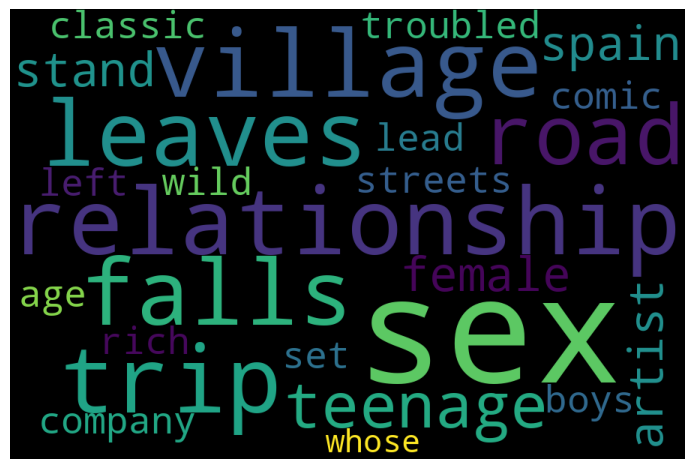

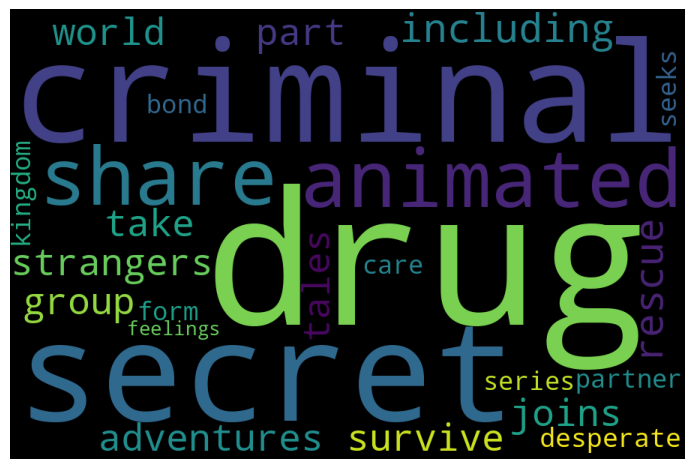

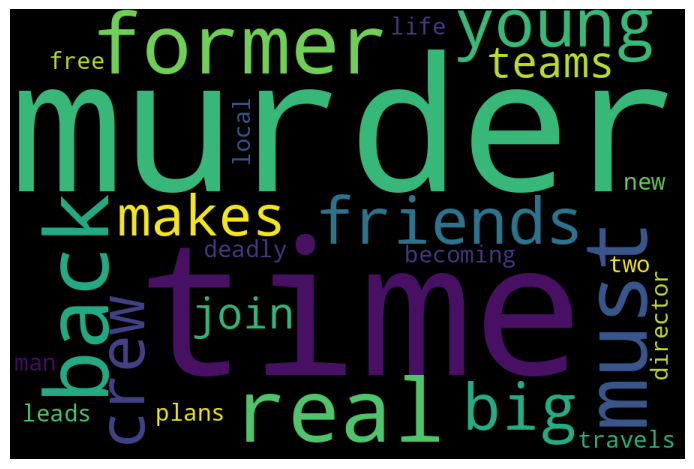

In [52]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp=zip(vocab,comp)
  sorted_words=sorted(vocab_comp,key=lambda x:x[1],reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]



  wordcloud=WordCloud(width=900,height=600).generate(imp_words_topic)
  plt.subplots(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

draw_word_cloud(4)
draw_word_cloud(3)
draw_word_cloud(7)

<p>As we can see from the wordcloud that from two topics one is about relationship and other is about drug. therefore, topic modelling successfully classifies movies and shows into genre.</p>

<h5><b>Word Cloud for Countries with the most content available.</b></h5>

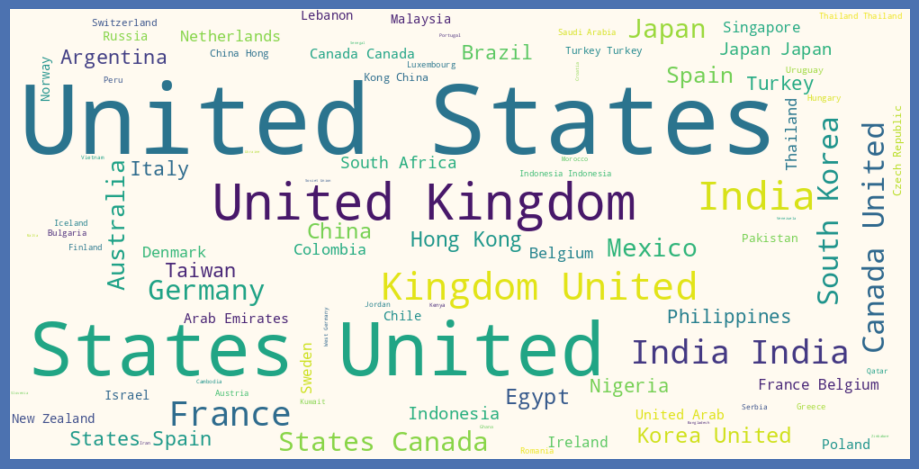

In [53]:
fig=plt.figure(figsize=(10,5),facecolor='b',edgecolor='r')
wordcloud=WordCloud(background_color='floralwhite',width=1000,height=500).generate(" ".join(nfx.country))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('country.png')
plt.show()

<h5><b>Word Cloud for Cast</b></h5>

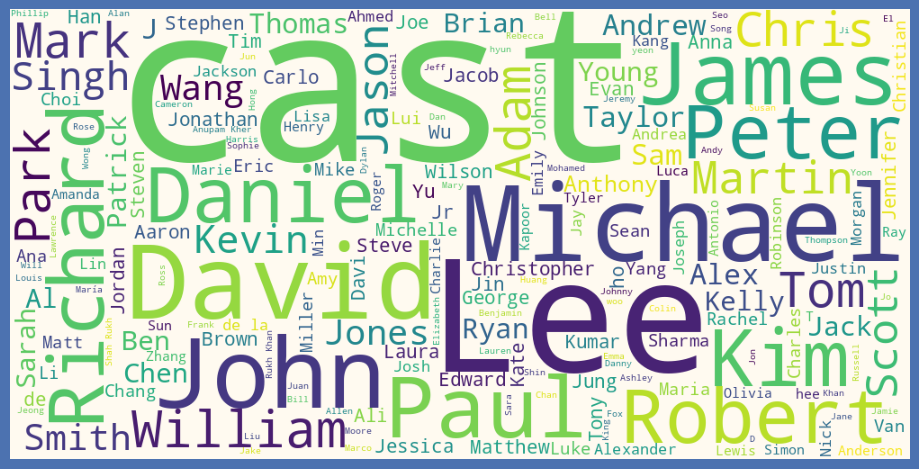

In [54]:
wordcloud=WordCloud(width=1000,height=500,background_color='floralwhite').generate(" ".join(nfx.cast))
fig=plt.figure(figsize=(10,5),facecolor='b',edgecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [55]:
#Top two countries where Netflix is most popular
country=nfx['country'].value_counts().reset_index()
country

,index,country
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


<BarContainer object of 11 artists>

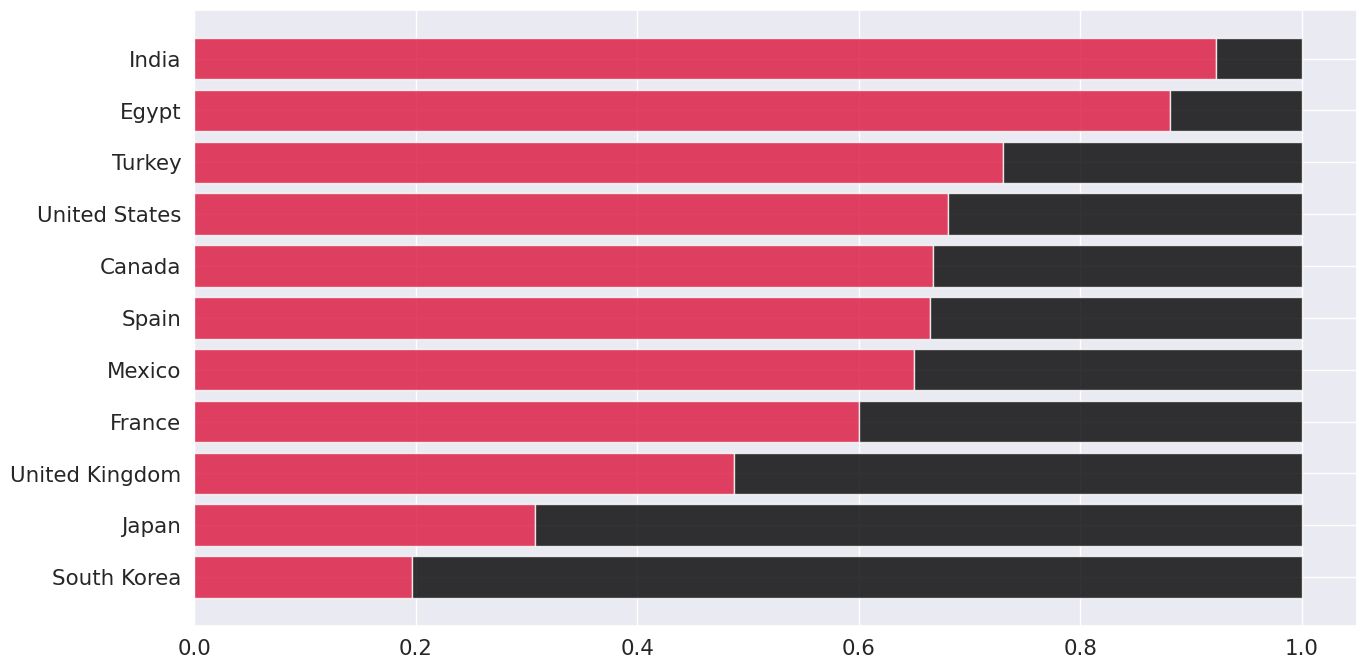

In [56]:
#Plotting the Horntal bar plot for top 10 country contains Movi and TV Show split
country_order=nfx['country'].value_counts()[:11].index
content_data=nfx[['type','country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum']=content_data.sum(axis=1)
content_data_ratio=(content_data.T/content_data['sum']).T[['Movie','TV Show']].sort_values(by='Movie',ascending=True)

#Plotting the barh
fig,ax=plt.subplots(1,1,figsize=(15,8))
ax.barh(content_data_ratio.index,content_data_ratio['Movie'],color='crimson',alpha=0.8,label='Movie')
ax.barh(content_data_ratio.index,content_data_ratio['TV Show'],left=content_data_ratio['Movie'],color='black',alpha=0.8,label='TV Show')

India has highest number of movies in Netflix

In [57]:
#Creating new column for age rating
rating_ages={
    'TV-PG':'Older Kids',
    'TV-MA':'Adults',
    'TV-Y7-FV':'Older Kids',
    'TV-Y7':'Older Kids',
    'TV-14':'Young Adults',
    'R':'Adults',
    'TV-Y':'Kids',
    'NR':'Adults',
    'PG-13':'Teens',
    'TV-G':'Kids',
    'PG':'Older Kids',
    'G':'Kids',
    'UR':'Adults',
    'NC-17':'Adults'
}
nfx['age_rating']=nfx['rating'].replace(rating_ages)
nfx['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [58]:
#Preparing Data for Heatmap
nfx['count']=1
data=nfx.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:11]
data=data['country']

nfx_heatmap=nfx.loc[nfx['country'].isin(data)]
nfx_heatmap=pd.crosstab(nfx_heatmap['country'],nfx_heatmap['age_rating'],normalize="index").T
nfx_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,Turkey,United Kingdom,United States
age_rating,,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.53,0.512626,0.471976
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.01,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.10,0.204545,0.195346
Teens,0.016949,0.000000,0.008696,0.004334,0.013393,0.01,0.000000,0.007463,0.00,0.017677,0.075385
Young Adults,0.129944,0.683168,0.156522,0.563380,0.339286,0.13,0.382514,0.089552,0.36,0.171717,0.167814


<h5><b>Correlation Heatmap</b></h5>

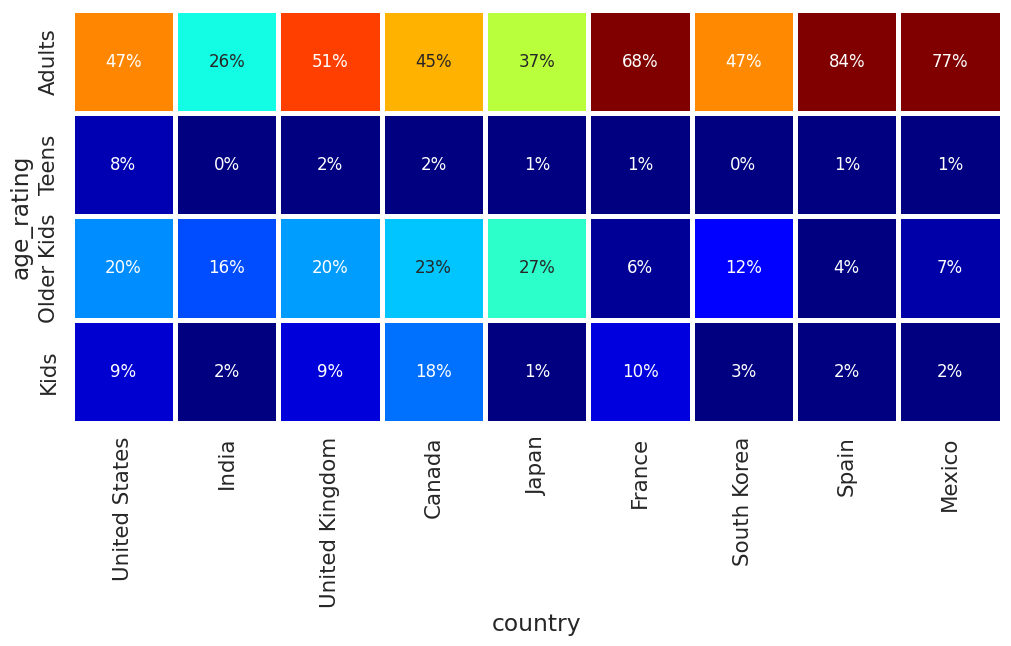

In [59]:
fig,ax=plt.subplots(1,1,figsize=(12,12))
country_order2=['United States','India','United Kingdom','Canada','Japan','France','South Korea','Spain','Mexico']
age_order=['Adults','Teens','Older Kids','Kids']
sns.heatmap(nfx_heatmap.loc[age_order,country_order2],cmap="jet",square=True,linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

<h5><b>Observations:</b></h5>
<ol>
<li>It is also interesting to see parallels between culturally compareble nations-the US and UK are closely aligned with their Netflix target ages but radically different from example India or Japan.</li>
<li>Also, mexico and spain have similar content on Netflix different age groups.</li>
</ol>

<h5><b>Clustering</b></h5>

Scalling the Data

In [60]:
#transform the data using StandardScaler
nfx_standarized=pd.DataFrame(StandardScaler().fit_transform(new_fx_df),columns=new_fx_df.columns)

#Perform a PCA to visualize clusters
pca=PCA(n_components=2)
nfx_df_pca=pd.DataFrame(pca.fit_transform(nfx_standarized))

In [61]:
nfx_standarized.head()

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,1.496730,-2.041874,0.692007,0.492431,-1.280409,1.085402,1.084704,0.338363
1,-0.668123,-0.505402,0.235584,0.492431,0.466895,0.381808,-1.798194,1.452263
2,-0.668123,-0.099864,-0.334945,-1.051632,0.172406,0.589688,-0.356745,1.452263
3,-0.668123,0.871140,-0.563157,-1.566319,0.211671,-1.712983,-1.077469,1.173788
4,-0.668123,0.871140,-0.677263,-1.566319,1.055874,0.253882,1.084704,-1.610961


<h5><b>Cluster Model Implementation</b></h5>
<ol>
<li>Affinity Propagation</li>
<li>Agglomerative Clustering</li>
<li>K-Means Clustering</li>
</ol>

<h5><b>1. Affinity Propagation</b></h5>

In [62]:
af=AffinityPropagation(preference=-753,damping=0.60,verbose=True,random_state=0).fit(nfx_standarized)
cluster_centers_indices=af.cluster_centers_indices_
labels=af.labels_

n_clusters=len(cluster_centers_indices)

print('Estimated number of clusters:%d'% n_clusters)
print('Silhouette Coefficient:%0.3f'% metrics.silhouette_score(nfx_standarized,labels,metric='sqeuclidean'))

Converged after 125 iterations.
Estimated number of clusters:13
Silhouette Coefficient:0.265


Text(0, 0.5, 'PCA component 2')

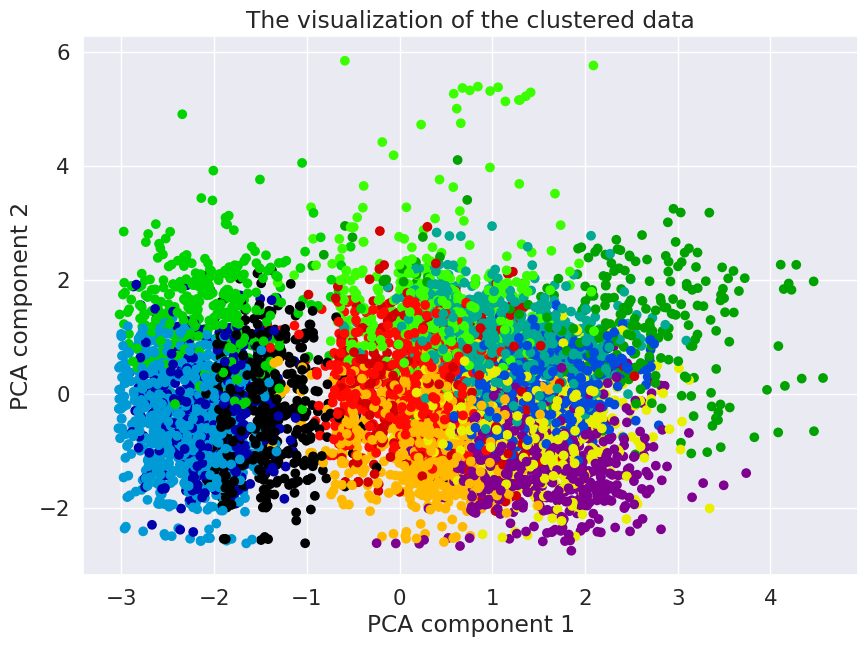

In [63]:
colors=cm.nipy_spectral(labels.astype(float)/n_clusters)
fix,ax=plt.subplots(figsize=(10,7))
plt.scatter(nfx_df_pca[0],nfx_df_pca[1],c=colors)
ax.set_title('The visualization of the clustered data')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')

Silhouette Coefficient score is 0.265 which is not that well. So, we will try some different clustering models

<h5><b>2. Agglomerative Clustering</b></h5>

In [64]:
def silhouette_analysis(X,X_pca,range_n_clusters):

  for n_clusters in range_n_clusters:
    fig,(ax1,ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,10)

    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])

    clusterer=AgglomerativeClustering(n_clusters=n_clusters,affinity='euclidean',linkage='ward')
    cluster_label=clusterer.fit_predict(X)

    silhouette_avg=silhouette_score(X,cluster_label)
    print('For n_clusters=',n_clusters,'The average silhouette_score is :',silhouette_avg)

    sample_silhouette_values=silhouette_samples(X,cluster_label)

    y_lower=15
    for i in range(n_clusters):
      ith_cluster_silhouette_values=\
      sample_silhouette_values[cluster_label==i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i=ith_cluster_silhouette_values.shape[0]
      y_upper=y_lower+size_cluster_i

      color=cm.nipy_spectral(float(i)/n_clusters)
      ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
      ax1.text(-0.5,y_lower+0.5*size_cluster_i,str(i))
      y_lower=y_upper+10
    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The Silhouette coefficient values')
    ax1.set_ylabel('Clusters')

    ax1.axvline(x=silhouette_avg,color='cyan',linestyle='--')

    ax1.set_yticks([])
    ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])
    colors=cm.nipy_spectral(cluster_label.astype(float)/n_clusters)
    ax2.scatter(X_pca[0],X_pca[1],c=colors)

    ax2.set_title('The visualization of the clustered data.')
    ax2.set_xlabel('PCA component 1')
    ax2.set_ylabel('PCA components 2')

    plt.suptitle(('\n Silhouette analysis for Agglomerative clustering with n_clusters=%d'% n_clusters),fontsize=14,fontweight='bold')
    plt.show()

Assume we cut vertical lines with a horizontal line to obtain the number of clusters.<br>
Number of clusters=4

For n_clusters= 4 The average silhouette_score is : 0.1784256327510329


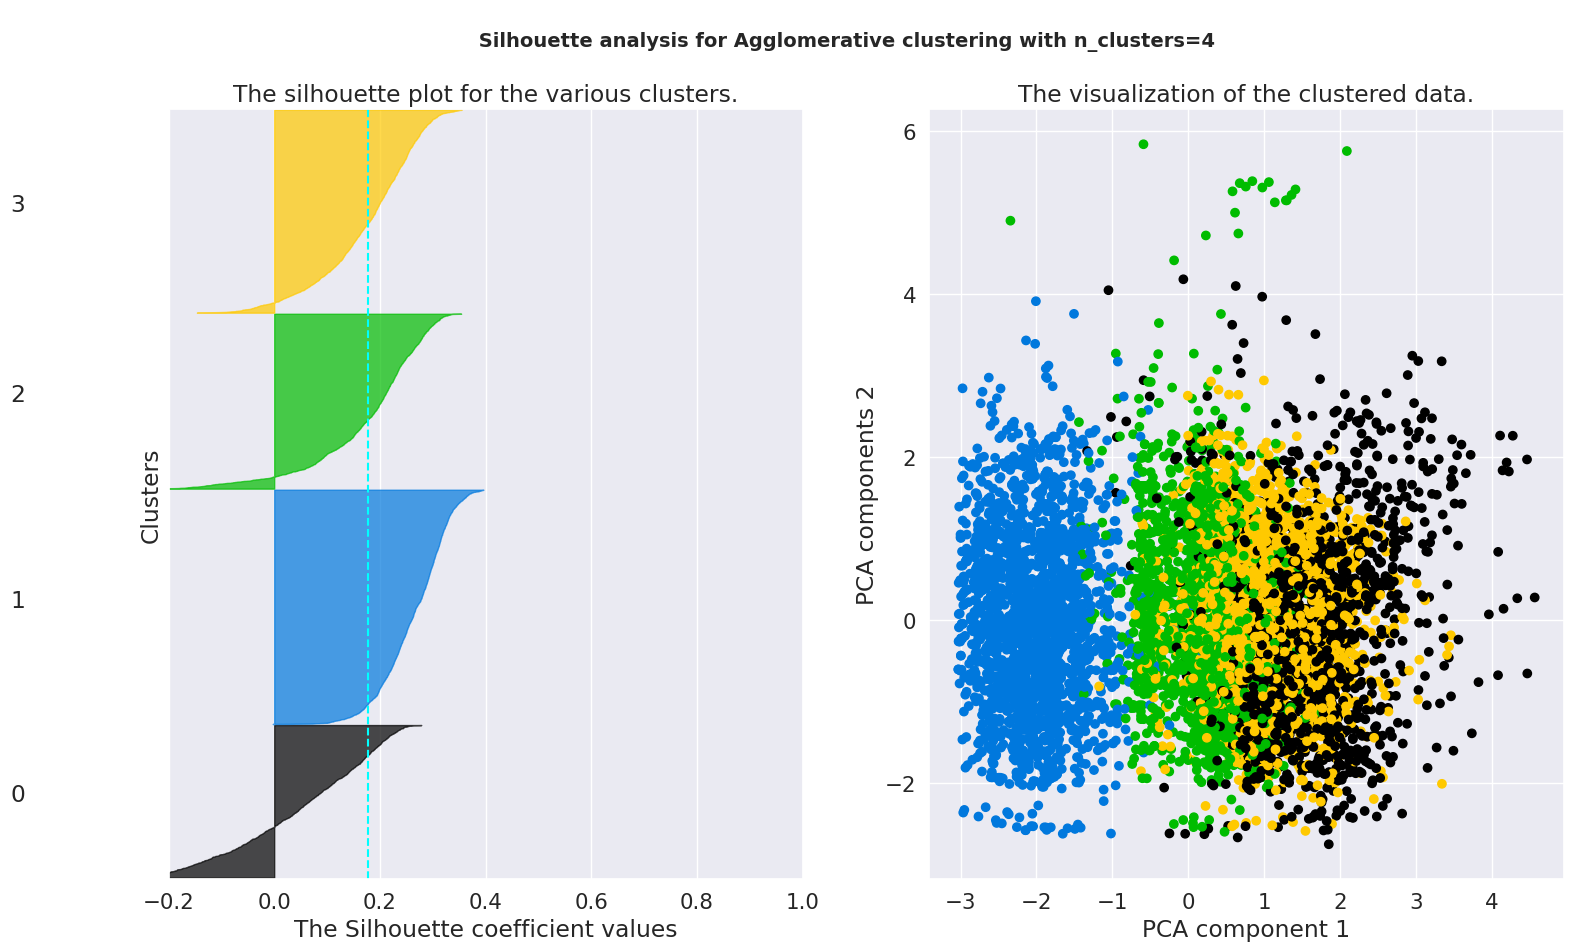

In [65]:
silhouette_analysis(np.array(nfx_standarized),nfx_df_pca,[4])

In [66]:
#Applying Tfidf Vectorizer
tfidfmodel=TfidfVectorizer(max_features=5000)
x_tfidf=tfidfmodel.fit_transform(nfx['description'])
x_tfidf.shape

(7770, 5000)

In [67]:
#Convert into array form for clustering
X_array=x_tfidf.toarray()

<h5><b>3. K-Means Clustering</b></h5>

Finding the optinal number of clusters using the elbow method

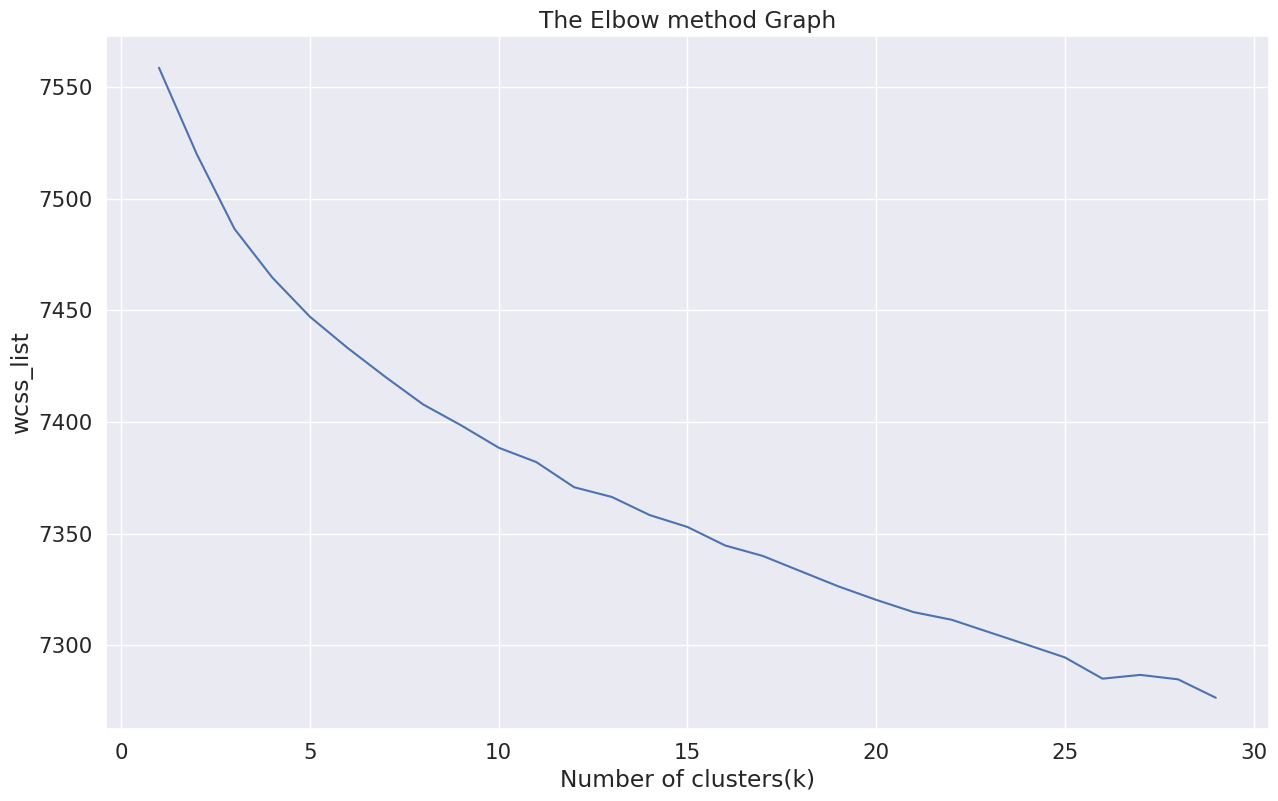

In [68]:
#finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list=[] # Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30
for i in range(1,30):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X_array)
  wcss_list.append(kmeans.inertia_)

plt.plot(range(1,30),wcss_list)
plt.title('The Elbow method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()
